# Student Exam Performance Analysis

![](dataset-cover.jpg)

## Introduction

The dataset includes observation on 500 students, representing a diverse range of study habits and past exam performance. The main goal of this analysis is to find out how study hours relate to one's current exam performance (pass/fail), accounting for the possible impact of past exam results.

### Dataset Description

**Features**:

- Study Hours (numeric): Represents the number of hours a student spent studying for the upcoming exam.
- Previous Exam Score (numeric): Indicates the student's score in the previous exam.
- Pass/Fail (binary): The target variable, where 1 represents a pass and 0 represents a fail in the current exam.

### Importing Libraries

In [22]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Importing dataset

In [23]:
# importing dataset
df = pd.read_csv("student_exam_data.csv")

#print the dataset
print(df.head())

   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


In [24]:
df.shape

(500, 3)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [26]:
sum(df.duplicated())

0

In [27]:
df.dtypes

Study Hours            float64
Previous Exam Score    float64
Pass/Fail                int64
dtype: object

In [28]:
leng = df.shape[0]
student_ids = ['Student {}'.format(i) for i in range(1, leng + 1)]
position = 0
df.insert(loc= position, column='Student_id', value=student_ids)


df.head()

,Student_id,Study Hours,Previous Exam Score,Pass/Fail
0,Student 1,4.370861,81.889703,0
1,Student 2,9.556429,72.165782,1
2,Student 3,7.587945,58.571657,0
3,Student 4,6.387926,88.827701,1
4,Student 5,2.404168,81.083870,0


In [29]:
df.columns = [col.replace(' ', '_').replace('/', '_').lower() for col in df.columns]

df.head()

,student_id,study_hours,previous_exam_score,pass_fail
0,Student 1,4.370861,81.889703,0
1,Student 2,9.556429,72.165782,1
2,Student 3,7.587945,58.571657,0
3,Student 4,6.387926,88.827701,1
4,Student 5,2.404168,81.083870,0


In [30]:
for col in df.columns:
    if df.dtypes[col] == 'float64':  # Checking if the column data type is float
        df[col] = df[col].round(2)
        
df.head()

,student_id,study_hours,previous_exam_score,pass_fail
0,Student 1,4.37,81.89,0
1,Student 2,9.56,72.17,1
2,Student 3,7.59,58.57,0
3,Student 4,6.39,88.83,1
4,Student 5,2.40,81.08,0


In [31]:
df['Result'] = df['pass_fail'].map({0: "Fail", 1: "Pass"})

df.head()

,student_id,study_hours,previous_exam_score,pass_fail,Result
0,Student 1,4.37,81.89,0,Fail
1,Student 2,9.56,72.17,1,Pass
2,Student 3,7.59,58.57,0,Fail
3,Student 4,6.39,88.83,1,Pass
4,Student 5,2.40,81.08,0,Fail


In [32]:
df.describe()

,study_hours,previous_exam_score,pass_fail
count,500.000000,500.000000,500.000000
mean,5.487080,68.916960,0.368000
std,2.688059,17.129535,0.482744
min,1.050000,40.280000,0.000000
25%,3.175000,53.750000,0.000000
50%,5.620000,68.305000,0.000000
75%,7.805000,83.577500,1.000000
max,9.940000,99.980000,1.000000


### Exploratory Data Analysis

In [33]:
# creating a histogram
def create_histogram(data, bins=10, xlabel='', ylabel='', title=''):
    plt.figure(figsize=[12,8])
    sns.distplot(df[data], kde = False, bins = bins, color= 'darkslategray');
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.show()


# creating a pie chart
def pieplot(data, title=''):
    counts = df[data].value_counts()
    print(counts)

    # to represent it in a pie plot
    plt.figure(figsize = (10,6))
    labels = counts.index
    plt.pie(counts, labels = labels, radius = 1.8, autopct = '%0.2f%%', colors = ['darkslategray', 'lightgrey'],
            textprops = {'fontsize' : 12}, startangle= 60, counterclock= False, wedgeprops= {'width' : 1.0});
    plt.axis('equal')
    plt.legend(loc = 'upper right', fontsize = 12)
    plt.title(title, fontsize = 14 )
   


### Understanding the Distribution of Student's study hours

Mean:5.48708
Median:5.62
Standard Deviation:2.69


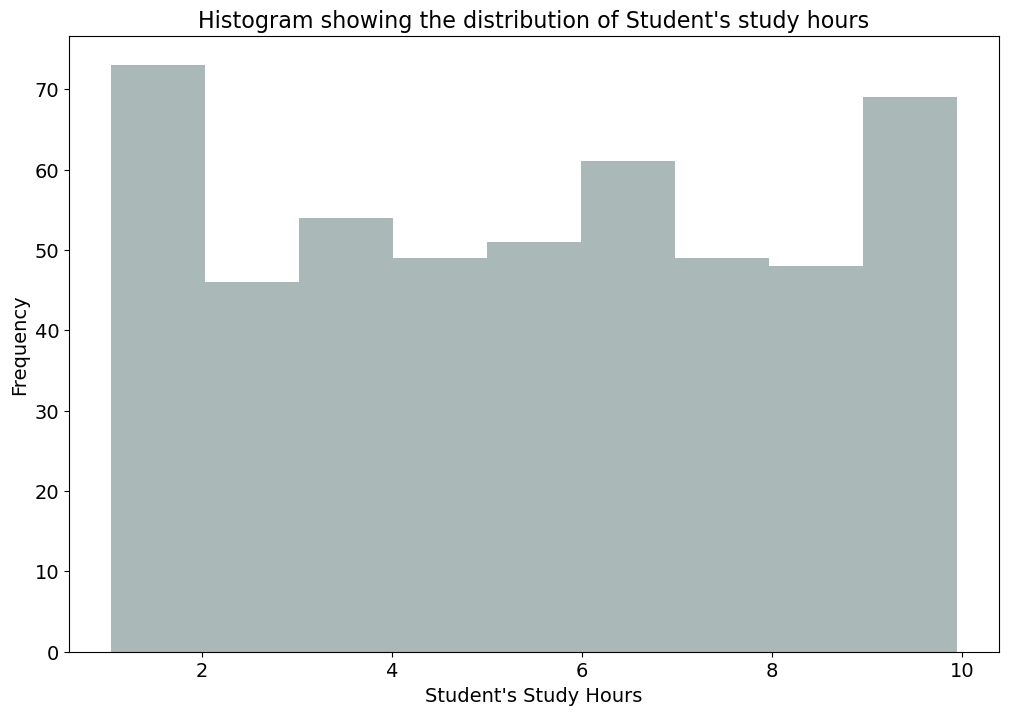

In [34]:
#mean, median and Standard Deviation
print("Mean:" + str(df.study_hours.mean()), end= '\n')
print("Median:" + str(df.study_hours.median()), end= '\n')
print("Standard Deviation:" + str(round(df.study_hours.std(), 2)), end= '\n')


# plotting the distribution
create_histogram('study_hours', 
                 bins = 9, 
                 xlabel= "Student's Study Hours", 
                 ylabel= "Frequency", 
                 title= "Histogram showing the distribution of Student's study hours"
                )

**Explanation**

The mean, median and Standard deviation provides context to the measures of center and spread of the data. The result and the image shows that more students spent between 1-2 hours studying for their upcoming exams. The image also specifies that a lot of students also spent between 9-10 hours studying for the exam. The standard deviation is quite big compared to the mean values and this suggest the presence of extreme values in the dataset which a lot of them occur in the "1-2 hours" bin and "9-10 hours" bin which is displayed in the histogram above.

The data is slightly Negatively Skewed.

### Understanding the distribution of Student's Previous Exam Scores

Mean:68.92
Median:68.305
Standard Deviation:17.13


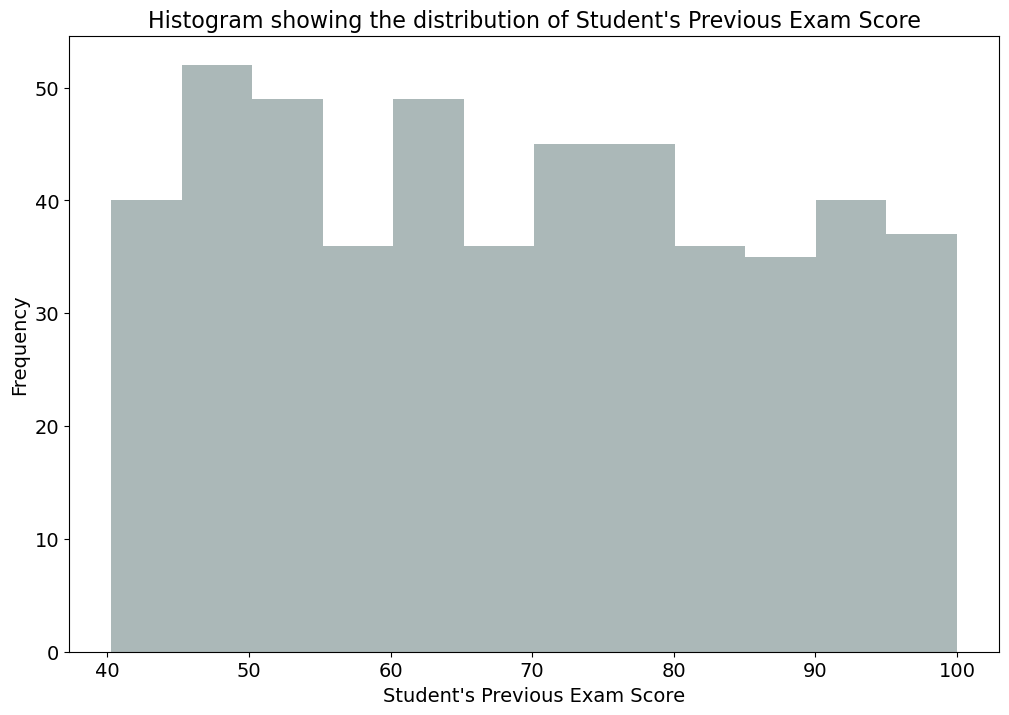

In [35]:
#mean, median and Standard Deviation
print("Mean:" + str(round(df.previous_exam_score.mean(),2)), end= '\n')
print("Median:" + str(df.previous_exam_score.median()), end= '\n')
print("Standard Deviation:" + str(round(df.previous_exam_score.std(), 2)), end= '\n')


# plotting the distribution
create_histogram('previous_exam_score', 
                 bins = 12, 
                 xlabel= "Student's Previous Exam Score", 
                 ylabel= "Frequency", 
                 title= "Histogram showing the distribution of Student's Previous Exam Score"
                )

**Explanation**

The mean value indicates that on Average, students scored 68.92 marks in the previous exams. The median score from the previous exam which is 68.305 marks, suggests that half of the students scored below 68.305, and half scored above it. From the chart above, it is evident that majority of the students scored 45-55 marks in the previous exams. Also a lot of students also scored between 60-65 marks in the previous exams.

### Understanding the distribution of the Student's Results in the current Exam

Result
Fail    316
Pass    184
Name: count, dtype: int64


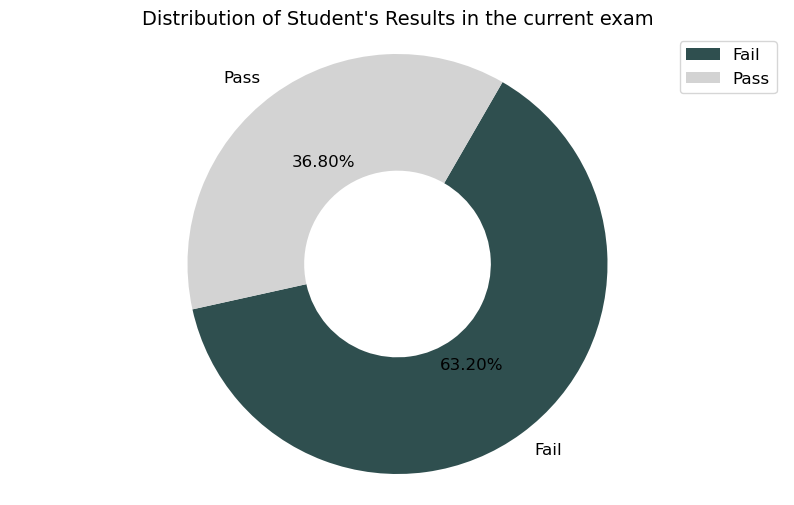

In [36]:
# to plot the pie chart for the current result
pieplot('Result', title= "Distribution of Student's Results in the current exam")

plt.savefig('piechart.png')

**Explanation**

The pie chart above shows the distribution of students performance in the current exam. The illustration states that **36.8% (184)** of the students passed while the remaining **63.2% (316)** of students failed in the current exams. 

### Study Hours vs. Pass/Fail

For this analysis, I want to explore the relationship between the number of hours the Student's used to study and the Outcome of their current exam. To check this, I would need to check for a correlation but first, I want to explore the distribution the study hours for both the students.

<Figure size 800x600 with 0 Axes>

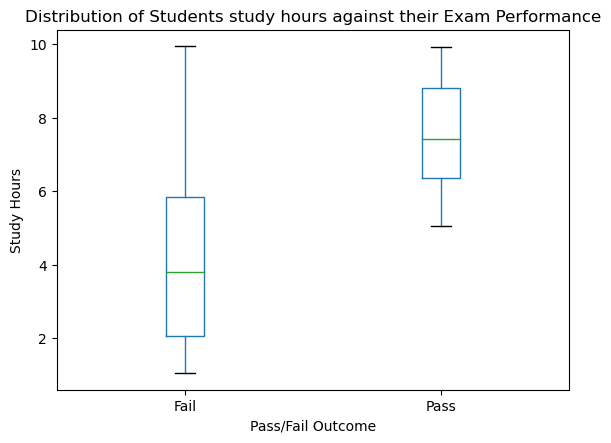

<Figure size 640x480 with 0 Axes>

In [39]:
# to build the boxplot
def create_boxplot(data, x_variable, y_variable, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(8, 6))  
    data.boxplot(column=y_variable, by=x_variable, grid = False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)  
    plt.suptitle('') 
    #plt.show()
    
    
create_boxplot(df, "pass_fail", "study_hours", xlabel= 'Pass/Fail Outcome', ylabel= 'Study Hours', title= 'Distribution of Students study hours against their Exam Performance')
labels = {0: 'Fail', 1: 'Pass'}
plt.xticks([1, 2], labels.values())
plt.show()


plt.savefig('boxplt.png')

The illustration above shows the distribution of study hours for Student who passed and students who failed their current exams and from the illustration, it shows that student who pass dedicate more hours compared to students who failed. There are some exceptions where students dedicated more hours into their study and failed. 

Does this mean that if you dedicate more hours to study then you would pass your exams? Does your previous exam score help determine if a student would pass or fail in the current exam?

The next analysis aims to understand the relationship between the previous student score, number of study hours and thr outcome in the current exam. This would give us an understanding of how study habits and previous performance correlate with exam outcomes and help identify factors that contribute to student success.

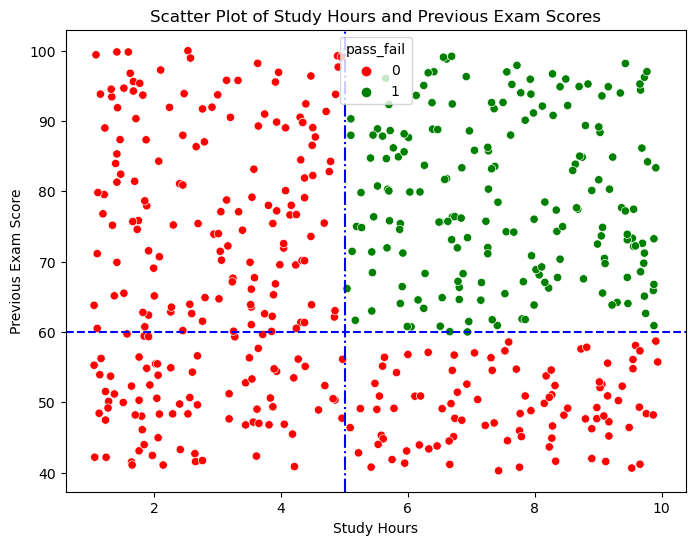

In [40]:
def create_scatter_plot(data, x_variable, y_variable, color_variable, color_palette=None, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_variable, y=y_variable, hue=color_variable, data=data, palette=color_palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=color_variable)
    plt.grid(False)  # Add gridlines if needed
   # plt.show()
    

create_scatter_plot(df, 'study_hours', 'previous_exam_score', 'pass_fail', 
                    color_palette = ['red', 'green'],
                   title= 'Scatter Plot of Study Hours and Previous Exam Scores',
                   xlabel = 'Study Hours', ylabel= 'Previous Exam Score')
plt.axhline(y=60, color='b', linestyle='--', label='Horizontal Line')
plt.axvline(x=5, color='b', linestyle='-.', label='Vertical Line')


plt.savefig('scatter.png')

From the illustration above, it displays a scatter plot of Study Hours against Previous Exam scores of the students and it colors the points on the chart based of the status of the result. The Chart shows that Students who passed their previous exams (above 60 marks) and dedicated long hours to thier study (5 Hours and above) all passed thier current exams (Hence the green color). However students who had a lot of study hours but didnt pass thier previous exam (Below 60 marks) also didnt pass their current exam and vice versa.

Hence the next step is to create a correlation matrix to observe the correlation between the variables in the table.

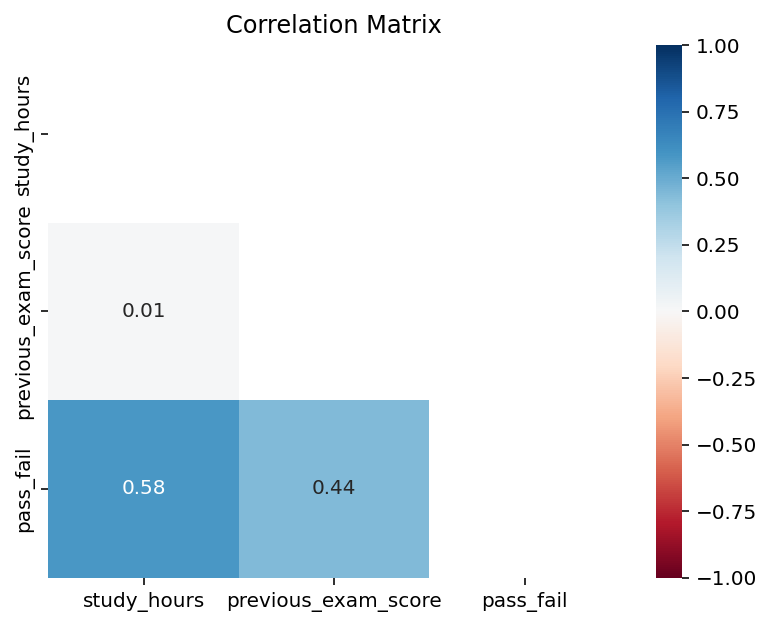

<Figure size 640x480 with 0 Axes>

In [43]:
def create_correlation(df, method, title):
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(method=method), ax = ax, vmin = -1, vmax = 1, cmap='RdBu', annot=True, mask=mask)
    plt.title(title)
    plt.show()
    
corr_df = df[['study_hours', 'previous_exam_score', 'pass_fail']]
create_correlation(corr_df, 'pearson', "Correlation Matrix")

plt.savefig('correlation.png')

When the correlation coefficient between two variables is positive, It means that when one variable increases then the other variable would increase. The correlation between study_hours and pass_fail is 0.58 and the correlation between previous exam score and pass_fail is 0.44. A correlation coefficient of 0.58 and 0.44 suggests that the strength of the relationships is moderate and not strong. 

For the relationship between study_hours and pass_fail,  it suggests that students who study more tend to get higher scores on average, but there will still be variability in scores among students who study the same amount and this was clearly seen in previous charts 

### Logistic Regression

From the exploratory data analysis, we can see that there is some form of relationship between the number of hours a student has studied, the student's previous exam score and how it influences the outcome in the current exam. This stage involves building a logistic regression model that would predict whether a student will pass or fail an exam based on the number of study hours and their scores in the previous exam.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [45]:
# to assign outcome y
y = df['pass_fail']

# to assign the predictors X
X = df[['study_hours', 'previous_exam_score']]

In [46]:
# to split out data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# to test if it worked
X_train.shape

(350, 2)

In [47]:
# to build and initiate the model
model = LogisticRegression()

# to fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8533333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.79      0.82      0.80        55

    accuracy                           0.85       150
   macro avg       0.84      0.85      0.84       150
weighted avg       0.85      0.85      0.85       150


Confusion Matrix:
 [[83 12]
 [10 45]]


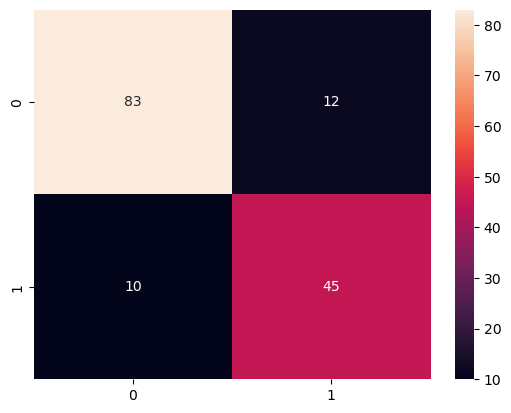

In [50]:
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True)

plt.savefig('confususion.png')

The Logistic Regression model was built to predict the pass/fail outcomes of students based on study hours and previous exam scores. The model was built using Pass/Fail as the outcome or the target variable while the Study Hours and previous exam scores were the predicting variables. 



**Model Evaluation**

The model accuracy was given as 85.3% which means that out of every 100 students, the model can accurately predict if 85 students would fail or pass a class based on their number of study hours and Previous Exam Scores.

A classification report was carried out to further assess the performance of the variable as well as a confusion matrix


**Model Testing**


In [55]:
# to test the model
my_parameter = np.array([[7.0, 70]])
model.predict(my_parameter)

array([1], dtype=int64)